### Import libraries

In [2]:
# For data manipulation
import pandas as pd
import numpy as np 

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# For data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For data modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Load dataset

In [3]:
df = pd.read_csv('./Dataset/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Encoding categorical data

In [4]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

### Data visualization

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


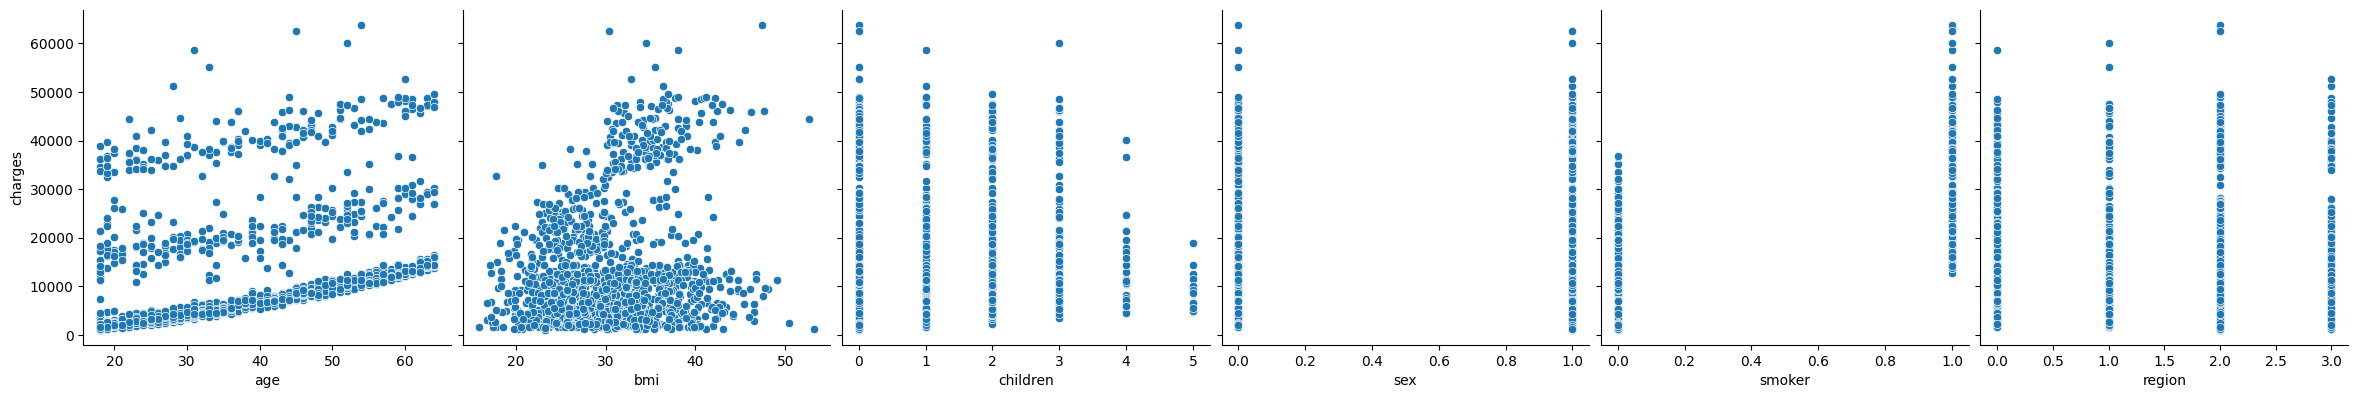

In [5]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children', 'sex', 'smoker', 'region'], y_vars='charges', size=4, aspect=1, kind='scatter')

<Axes: >

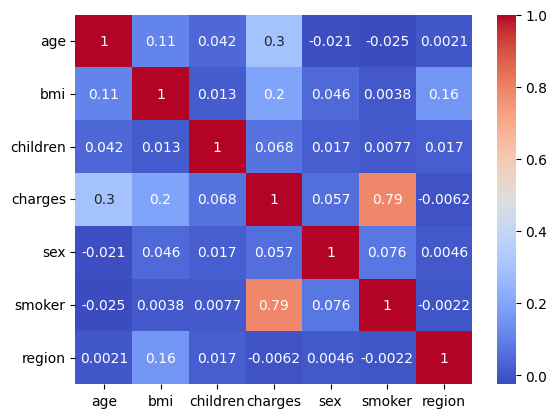

In [6]:
corr = df[['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Split data

In [7]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Modelling

In [9]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

### Predict

In [10]:
y_pred = linear_model.predict(x_test)

### Evaluate

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE Score : {mse}')
print(f'R2 Score : {r2_score}')
print(f'MAE Score : {mae}')

MSE Score : 31845929.13415943
R2 Score : 0.7998747145449959
MAE Score : 3930.3332739011403


### Visualize Model

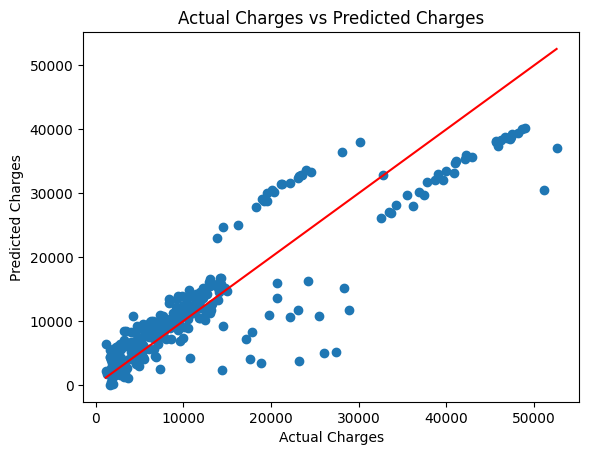

In [12]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()